In [2]:
import os
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

## Libraries:

Numpy: http://www.numpy.org/

Pandas: https://pandas.pydata.org/

Scikit-learn: http://scikit-learn.org/stable/

SciPy: https://www.scipy.org/

## Working with datasets

In [19]:
np.mean(iris['data'])

3.4644999999999997

In [20]:
iris['data']+10 #adds across all things like matlab

array([[15.1, 13.5, 11.4, 10.2],
       [14.9, 13. , 11.4, 10.2],
       [14.7, 13.2, 11.3, 10.2],
       [14.6, 13.1, 11.5, 10.2],
       [15. , 13.6, 11.4, 10.2],
       [15.4, 13.9, 11.7, 10.4],
       [14.6, 13.4, 11.4, 10.3],
       [15. , 13.4, 11.5, 10.2],
       [14.4, 12.9, 11.4, 10.2],
       [14.9, 13.1, 11.5, 10.1],
       [15.4, 13.7, 11.5, 10.2],
       [14.8, 13.4, 11.6, 10.2],
       [14.8, 13. , 11.4, 10.1],
       [14.3, 13. , 11.1, 10.1],
       [15.8, 14. , 11.2, 10.2],
       [15.7, 14.4, 11.5, 10.4],
       [15.4, 13.9, 11.3, 10.4],
       [15.1, 13.5, 11.4, 10.3],
       [15.7, 13.8, 11.7, 10.3],
       [15.1, 13.8, 11.5, 10.3],
       [15.4, 13.4, 11.7, 10.2],
       [15.1, 13.7, 11.5, 10.4],
       [14.6, 13.6, 11. , 10.2],
       [15.1, 13.3, 11.7, 10.5],
       [14.8, 13.4, 11.9, 10.2],
       [15. , 13. , 11.6, 10.2],
       [15. , 13.4, 11.6, 10.4],
       [15.2, 13.5, 11.5, 10.2],
       [15.2, 13.4, 11.4, 10.2],
       [14.7, 13.2, 11.6, 10.2],
       [14

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris['data'].shape

(150, 4)

In [7]:
iris['feature_names'] #columns above

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris_df = pd.DataFrame(iris['data'], columns=iris["feature_names"])

In [9]:
iris_df #can do all kind of SQL queries with them, but diff syntax?

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_df[iris_df["sepal width (cm)"] > 3.5] #once have df can do all sql things, slice, groupby, etccc, just not shown in this lab

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
10,5.4,3.7,1.5,0.2
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
16,5.4,3.9,1.3,0.4
18,5.7,3.8,1.7,0.3
19,5.1,3.8,1.5,0.3
21,5.1,3.7,1.5,0.4
22,4.6,3.6,1.0,0.2


In [16]:
iris_df[iris_df["sepal width (cm)"] > 3.5] #he did something extra here and i missed it

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
10,5.4,3.7,1.5,0.2
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
16,5.4,3.9,1.3,0.4
18,5.7,3.8,1.7,0.3
19,5.1,3.8,1.5,0.3
21,5.1,3.7,1.5,0.4
22,4.6,3.6,1.0,0.2


In [12]:
# columns indexed 1,2
iris_df.iloc[:, 1:3] #way to get either rows or coloumns out of DF

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
5,3.9,1.7
6,3.4,1.4
7,3.4,1.5
8,2.9,1.4
9,3.1,1.5


In [13]:
# rows indexed 10-14
iris_df.iloc[10:15, :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2


In [14]:
iris_df.describe() #numerical description of DF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
iris_df[("sepal length (cm)")]

<bound method Series.max of 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64>

## 20 newsgroups dataset

In [21]:
DATA_DIR = "20_newsgroups"

In [26]:
! ls 20_newsgroups/sci.space #wowow what?

20_newsgroups/sci.space:
59497
59846
59848
59849
59850
59870
59871
59872
59873
59874
59904
59905
59906
59907
59908
59909
59913
60103
60151
60152
60153
60154
60155
60156
60157
60158
60159
60160
60161
60162
60163
60164
60165
60166
60167
60168
60169
60170
60171
60172
60173
60174
60175
60176
60177
60178
60179
60180
60181
60182
60183
60184
60185
60186
60187
60188
60189
60190
60191
60192
60193
60194
60195
60196
60197
60198
60199
60200
60201
60202
60203
60204
60205
60206
60207
60208
60209
60210
60211
60212
60213
60214
60215
60216
60217
60218
60219
60220
60221
60222
60223
60224
60225
60226
60227
60228
60229
60230
60231
60232
60233
60234
60235
60236
60237
60238
60239
60240
60241
60242
60243
60244
60245
60246
60247
60248
60249
60250
60251
60252
60253
60770
60771
60772
60773
60774
60775
60777
60778
60779
60780
60781
60782
60783
60784
60785
60786
60787
60788
60789
60790
60791
60792
60793
60794
60795
60796
60797
60798
60799
60800
60801
60802
60803
60804
60806
60807
60808
60809
60810
60811
60812
608

ls: cannot access '#wowow': No such file or directory
ls: cannot access 'what?': No such file or directory


In [22]:
os.listdir(DATA_DIR) #predict with high accuracy which discussion board a message came from- lab

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
os.listdir(os.path.join(DATA_DIR, "rec.autos"))

['101551',
 '101552',
 '101553',
 '101554',
 '101555',
 '101556',
 '101557',
 '101558',
 '101559',
 '101560',
 '101561',
 '101562',
 '101563',
 '101564',
 '101565',
 '101566',
 '101567',
 '101568',
 '101569',
 '101570',
 '101571',
 '101572',
 '101573',
 '101574',
 '101575',
 '101576',
 '101577',
 '101578',
 '101579',
 '101580',
 '101581',
 '101582',
 '101583',
 '101584',
 '101585',
 '101586',
 '101587',
 '101588',
 '101589',
 '101590',
 '101591',
 '101592',
 '101593',
 '101594',
 '101595',
 '101596',
 '101597',
 '101598',
 '101599',
 '101600',
 '101601',
 '101602',
 '101603',
 '101604',
 '101605',
 '101606',
 '101607',
 '101608',
 '101609',
 '101610',
 '101611',
 '101612',
 '101613',
 '101614',
 '101615',
 '101616',
 '101617',
 '101618',
 '101619',
 '101620',
 '101621',
 '101622',
 '101623',
 '101624',
 '101625',
 '101626',
 '101627',
 '101628',
 '101629',
 '101630',
 '101631',
 '101632',
 '101633',
 '101634',
 '101635',
 '101636',
 '101637',
 '101638',
 '101639',
 '101640',
 '101641',

In [28]:
print(open(os.path.join(DATA_DIR, "rec.autos", "103070"), "r").read()) #'rec.autos' in message is a problem, so need to strip it and calssify based on content of the message (training??)

Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gatech!howland.reston.ans.net!usenet.ins.cwru.edu!po.CWRU.Edu!aas7
From: aas7@po.CWRU.Edu (Andrew A. Spencer)
Newsgroups: rec.autos
Subject: Re: Manual Shift Bigots
Date: 22 Apr 1993 01:14:18 GMT
Organization: Case Western Reserve University, Cleveland, OH (USA)
Lines: 29
Message-ID: <1r4rha$98b@usenet.INS.CWRU.Edu>
References: <C5LIw2.CAx@news.rich.bnr.ca> <Apr17.054325.15482@engr.washington.edu> <crh.735198797@regent.e-technik.tu-muenchen.de> <Apr19.195700.19699@engr.washington.edu> <1993Apr21.100149.1501@rtsg.mot.com> <1993Apr21.184447.19630@bnr.ca>
Reply-To: aas7@po.CWRU.Edu (Andrew A. Spencer)
NNTP-Posting-Host: slc5.ins.cwru.edu


In a previous article, dwjz@bnr.ca (Doug Zolmer) says:

>In article <1993Apr21.100149.1501@rtsg.mot.com>, kissane@black.Berkeley.EDU (John G. Kissane) writes:
>|> As a matter of interest does anyone know why autos are so popular in the US while 
>|> here in Europe they are rare??? Just wondering.....
>
>In 

In [29]:
# build a list of paths of all files
#in asst going to be given model and need to improve on this model
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [30]:
len(all_files)

19997

In [31]:
all_files[:5]

[WindowsPath('20_newsgroups/alt.atheism/49960'),
 WindowsPath('20_newsgroups/alt.atheism/51060'),
 WindowsPath('20_newsgroups/alt.atheism/51119'),
 WindowsPath('20_newsgroups/alt.atheism/51120'),
 WindowsPath('20_newsgroups/alt.atheism/51121')]

## Building a feature set for classification

### Finding the most common words

In [33]:
def clean_file_text(text): #general comment not about this code section (y) binary encoding, try and use term frequency and different encode??? confused cant hear
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

def corpus_count_words(file_list): #figure out what the top 500 words are, first count all the words USE IN ASS't
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [34]:
news_cnt = corpus_count_words(all_files)

In [35]:
news_cnt.most_common(10) #lots of useless words, get rid like in IR

[('the', 227359),
 ('to', 126510),
 ('of', 120164),
 ('a', 100558),
 ('and', 96676),
 ('I', 89455),
 ('is', 72055),
 ('in', 68295),
 ('that', 67484),
 ('AX', 62406)]

In [36]:
num_words = 500
top_words = [word for (word, freq) in news_cnt.most_common(num_words)]
print(top_words)

['the', 'to', 'of', 'a', 'and', 'I', 'is', 'in', 'that', 'AX', 'edu', 'it', 'for', 'you', 'on', 'be', 'com', 's', 'have', 'are', 'not', 'with', 't', 'The', 'this', '1', 'as', 'or', 'was', 'From', 'Subject', 'ID', 'Message', 'Lines', 'Organization', 'they', 'but', 'by', 'can', 'In', 'from', 'at', '2', 'an', 'would', '0', 'will', 'writes', '3', 'about', 'if', 'Re', 'all', 'one', 'my', 'do', 'there', 'References', 'what', 'has', 'article', 'X', 'we', 'your', 'news', 'M', 'me', 'A', 'Sender', 'who', 'It', 'no', 'out', 'any', 'he', 'which', 'so', 'some', 'like', 'people', 'were', '4', 'University', 'If', 'more', 'their', 'don', '5', 'up', 'know', 'Posting', 'Host', 'them', 'just', 'other', 'than', 'get', 'had', 'only', 'been', 'think', 'when', 'This', '7', 'cs', '_', 'Q', 'ca', 'his', 'm', '6', '8', 'time', 'use', 'S', 'R', 'P', 'C', 'also', 'W', 'should', 'then', 'how', 'You', 'EDU', 'good', 'could', 'To', '9', 'does', 'am', 'D', 'because', 'into', 'these', 'way', 'G', 'U', 'say', 'see', '

### Create a binary encoding of dataset based on the selected features (X)

In [37]:
tokenizer = RegexpTokenizer(r'\w+') #go through top 500 words and 1,0 whether word appears in doc
df_rows = []
for file_path in all_files:
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        file_data = file.read()
        file_data = clean_file_text(file_data)
        file_words = tokenizer.tokenize(file_data)
        df_rows.append([1 if word in file_words else 0 for word in top_words])#creating a list and add to df_row and eventually add row to df      
X = pd.DataFrame(df_rows, columns = top_words)

In [25]:
X.head()

,the,to,of,a,and,I,is,in,that,AX,...,saying,human,info,Paul,change,American,SCSI,FBI,Also,Do
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Build a targets list (y)

In [26]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [27]:
# Create a dataframe of targets (y)
y = [get_target(get_topic_name(file_path)) for file_path in all_files]

In [28]:
y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Features and targets

In [29]:
X.assign(target_group=y)

,the,to,of,a,and,I,is,in,that,AX,...,human,info,Paul,change,American,SCSI,FBI,Also,Do,target_group
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,1,1,0
9,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Run Logistic Regression

In [30]:
# split dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #dont change split change random state

In [31]:
clf = LogisticRegression(C=1.0).fit(X_train, y_train) #ASSIGNMENT run confidence interval over accuracy, run many times at different random states

/Users/ec/miniconda3/envs/mie451-assignment-ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ec/miniconda3/envs/mie451-assignment-ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

In [33]:
# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

In [34]:
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.7378009573480031
Test accuracy: 0.57


### Confusion matrix

In [35]:
cm = confusion_matrix(y_test, y_test_predict) #what are problems in your classifier, may have confusion between two related categories

In [36]:
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,211,0,2,7,2,1,3,2,10,14,4,2,1,1,0,5,3,0,0,6
1,4,163,9,6,15,2,5,2,4,3,23,0,8,6,13,7,8,0,12,0
2,3,14,121,1,6,14,6,0,12,4,12,17,18,34,25,4,8,0,20,1
3,2,6,1,154,7,3,2,3,15,3,8,4,3,0,3,3,10,0,3,74
4,4,2,9,5,163,3,53,0,3,4,7,5,3,4,7,7,7,0,9,1
5,2,2,10,3,4,174,2,3,3,0,8,14,21,27,8,1,3,1,7,0
6,1,4,7,0,29,0,210,3,2,2,9,3,5,0,2,3,7,1,9,0
7,3,2,3,3,4,5,1,212,8,11,8,7,9,1,8,9,9,0,1,2
8,13,14,8,7,13,3,5,2,146,3,23,6,15,8,15,7,15,0,9,5
9,21,5,3,12,8,1,5,8,8,129,5,1,1,1,0,31,11,4,3,33


In [37]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    numTargets = cm.shape[0]
    plt.xticks(list(range(numTargets+1)))
    plt.yticks(list(range(numTargets+1)))

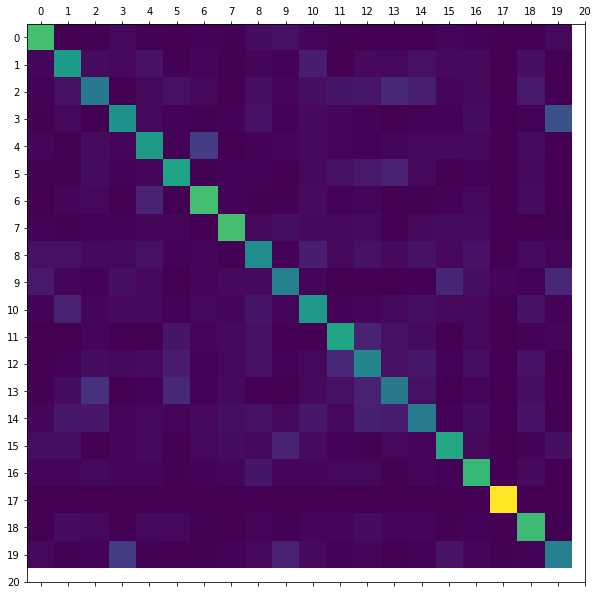

In [38]:
plot_confusion_matrix(cm) #wowow so pretty, lighter == more numbs